In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_project = "/content/drive/MyDrive/UDEM/ift6010/Project6010/ift6010-h21-team1" # @param string
%cd $path_to_project
!git pull

In [ ]:
!apt-get install musescore

In [4]:
!whereis musescore
from music21 import environment
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = "/usr/bin/musescore" # to let music21 find musescore

musescore: /usr/bin/musescore /usr/share/man/man1/musescore.1.gz


In [5]:
!pip install musicautobot

In [ ]:
!apt install musescore fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
!pip install torch fastai music21 pebble fluidsynth midi2audio

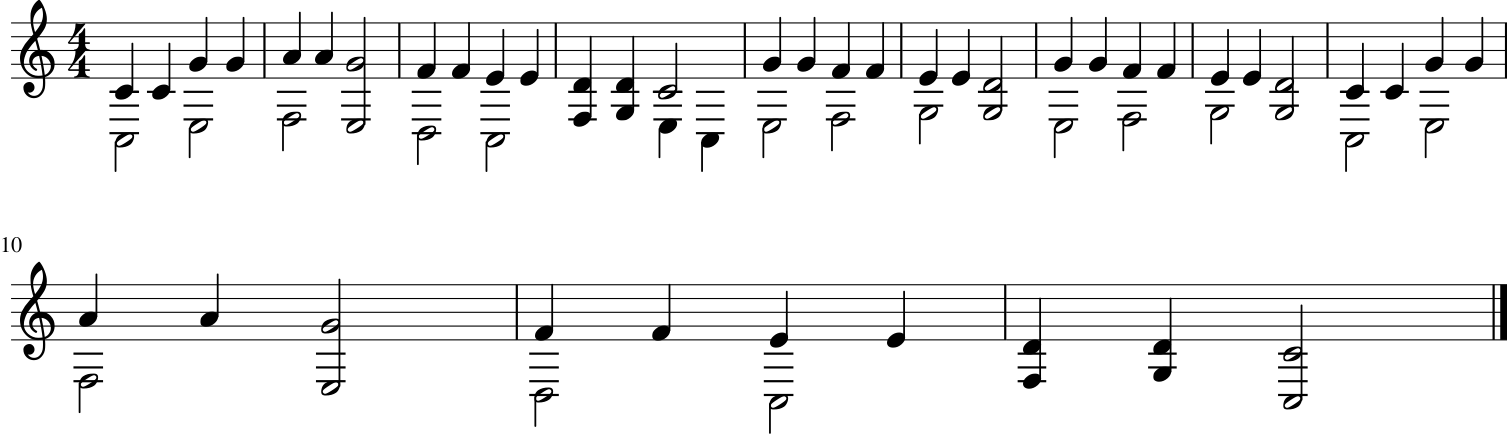

In [7]:
from musicautobot.numpy_encode import *
from musicautobot.config import *
from musicautobot.music_transformer import *
from musicautobot.multitask_transformer import *
from musicautobot.utils import midifile

#midi_file = Path('/content/drive/MyDrive/UDEM/ift6010/Project6010/ift6010-h21-team1/data/JSB Chorales/test/102.mid')
midi_file = Path('/content/drive/MyDrive/UDEM/ift6010/Project6010/twinkle_twinkle.mid')
vocab = MusicVocab.create()
item = MusicItem.from_file(midi_file, vocab); item.show()

In [8]:
sample1_txt = "xxbos xxpad n84 d39 n75 d19 n72 d15 n60 d29 xxsep d6 n68 d5 n65 d5 n61 d5 n58 d33 xxsep d6 n79 d53 n67 d5 xxsep d4 n83 d5 n67 d24 n55 d5 xxsep d4 n72 d19 n64 d19 n48 d15 xxsep d14 n60 d5 xxsep d6 n76 d9 n69 d19 n57 d19 xxsep d14 n84 d5 n76 d5 n69 d24 xxsep d4 n57 d5 xxsep d6 n86 d15 n77 d15 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5"
sample2_txt = "xxbos xxpad n84 d39 n75 d19 n72 d15 n60 d29 xxsep d6 n68 d5 n65 d5 n61 d5 n58 d33 xxsep d6 n79 d53 n67 d5 xxsep d4 n83 d5 n67 d24 n55 d5 xxsep d4 n72 d19 n64 d19 n48 d15 xxsep d14 n60 d5 xxsep d6 n76 d9 n69 d19 n57 d19 xxsep d14 n84 d5 n76 d5 n69 d24 xxsep d4 n57 d5 xxsep d6 n86 d15 n77 d15 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5"
sample3_txt = "xxbos xxpad n10 d39 n60 d39 xxsep d38 n72 d29 n64 d9 n48 d9 xxsep d10 n74 d19 n53 d19 xxsep d20 n65 d5 n56 d15 xxsep d14 n79 d48 n67 d19 xxsep d4 n86 d5 n55 d15 xxsep d4 n71 d9 n67 d24 xxsep d10 n72 d39 n64 d19 n60 d9 xxsep d10 n82 d29 n74 d29 n58 d29 xxsep d29 n87 d9 n82 d19 n63 d9 n48 d9 xxsep d10 n79 d5 n75 d24 n70 d48 n51 d19 xxsep d20 n58 d5 xxsep d4 n77 d9 n63 d9 n48 d9 xxsep d10 n79 d9 n75 d19 n63 d9 n48 d9 xxsep d10 n79 d5 n75 d24 n70 d48 n51 d19 xxsep d20 n58 d5 xxsep d4 n77 d9 n63 d9 n48 d9 xxsep d10 n79 d9 n75 d19 n63 d9 n48 d9 xxsep d10 n79 d5 n75 d24 n70 d48 n51 d19 xxsep d20 n58 d5 xxsep d4 n77 d9 n63 d9 n48 d9 xxsep d10 n79 d9 n75 d19 n63 d9 n48 d9 xxsep d10 n79 d5 n75 d24 n70 d48 n51 d19 xxsep d20 n58 d5 xxsep d4 n77 d9 n63 d9 n48 d9 xxsep d10 n79 d9 n75 d19 n63 d9 n48 d9 xxsep d10 n79 d5 n75 d24"
sample4_txt = "xxbos xxpad n91 d5 n84 d9 n75 d5 n60 d5 xxsep d6 n92 d5 n87 d9 n77 d5 xxsep d4 n96 d5 n80 d9 n68 d5 n53 d9 xxsep d6 n79 d53 n67 d5 xxsep d4 n83 d5 n67 d24 n55 d5 xxsep d4 n72 d19 n64 d19 n48 d15 xxsep d14 n60 d5 xxsep d6 n76 d9 n69 d19 n57 d19 xxsep d14 n84 d5 n76 d5 n69 d24 xxsep d4 n57 d5 xxsep d6 n86 d15 n77 d15 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75 d9 n66 d5 n57 d5 xxsep d6 n70 d48 n62 d15 n58 d9 xxsep d10 n56 d5 xxsep d4 n75"

In [9]:
def txt_to_time(txt):
  tokens = txt.split()
  nums = vocab.numericalize(tokens)
  num2 = [nums,nums]
  numpy_arr = np.array(num2)
  item_from_txt = MusicItem.from_idx(numpy_arr,vocab)
  return item_from_txt

In [10]:
from IPython.display import Audio
def mid_wav(mid_path, name):
  # call the bash script for midi to wav
  filename = f'{name}.wav'
  !bash midi2wav.sh "$mid_path" "$filename"
  #Audio(filename)

In [ ]:
samples = [sample1_txt,sample2_txt,sample3_txt,sample4_txt]
for i in range(len(samples)):
  item = txt_to_time(samples[i])
  stream = item.to_stream()
  name = f'sample-{i+1}'
  filename = f'sample-{i+1}.mid'
  stream.write("midi", filename)
  mid_wav(filename, name)